In [1]:
import numpy as np
# from scipy.special import binom
from scipy.special import genlaguerre
# from scipy.special import hyp1f1
import matplotlib.pyplot as plt
# x = np.arange(-1.0, 1.0, 0.01)
# np.allclose(genlaguerre(3, 3)(x), binom(6, 3) * hyp1f1(-3, 4, x))
import math

pi=math.pi
sign = lambda x: math.copysign(1, x) # two will work

def vd(E, B):
    return E/B

def beta(mu, vy, vt, vd):
    return (vd + mu*vt)/vy

def w_n_n(x, n):
    return (1/pi)*((-1)**(n))*np.exp(-0.5*abs(x)**2)*genlaguerre(n,0)(abs(x)**2)

def w_nm1_nm1(x,n):
    if n == 0:
        return  0
    else:
        return (1/pi)*((-1)**(n-1))*np.exp(-0.5*abs(x)**2)*genlaguerre(n-1,0)(abs(x)*abs(x)) 

def w_nm1_n(x,n):
    if n == 0:
        return 0
    else:
        return (1/(pi*np.sqrt(n)))*((-1)**(n-1))*x*np.exp(-0.5*abs(x)**2)*genlaguerre(n-1,1)(abs(x)*abs(x))    


def WDF(x, n, delta, lbda, beta):
    return   (1/2**(1-delta))*(w_n_n(x, n) + w_nm1_nm1(x,n) - 2*lbda*beta*np.real(w_nm1_n(x,n)))    

In [2]:
def renyiEntropy(x, p, matrix, alpha):
    L2norm = np.sqrt(np.trapz(p, np.trapz(x, abs(matrix)**2)))
    pdf = (matrix)/L2norm
    entropy = (1/(1-alpha))*np.log((np.trapz(p, np.trapz(x, abs(pdf)**2**alpha))))
    del L2norm, pdf
    return entropy

In [42]:
# Stale materialowe
vx = 0.86
vy = 0.69
vt = 0.32

mu = 1 # 1 lub -1 Punkt K lub K' w innych pracach parametr ksi

ky = 0
py = 0

lbda = 1 # Co to jest???

B = 1.0 # magnetic field
E = 0.25 # electric field

lb=1/np.sqrt(B) # magnetic lenght

n = 1

arrayX = np.arange(-10.0, 10.01, 0.01)
px=np.arange(-10.0, 10.01, 0.01)

if n == 0:
    delta = 1
else:
    delta = 0
    
#u = ((1- beta**2)**(1/4))*(q/lb)*((vy/vx)**(1/2))
#electricArray = np.arange(-0.9, 0.3, 0.01)
#electricArray_Kp = np.arange(-0.3, 0.9, 0.01)

electricArray = np.arange(0, 0.35, 0.01)
electricArray_Kp = np.arange(0, 0.35, 0.01)

#driftVeloArray = np.arange(-5, 5, 0.1)
renyiArray = []
renyiArray_Kp = []
#print(driftVeloArray)

for i in range(len(electricArray)):
    #vd = vd(E, B)
    mu=1
    beta1 = beta(mu, vy, vt, electricArray[i]/B)
    #beta1 = beta(mu, vy, vt, driftVeloArray[i])
    ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
    s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
    
    ksiM, sM = np.meshgrid(ksi,s)
    x = np.sqrt(2)*(ksiM + 1j*sM) 
    
    renyiArray.append(renyiEntropy(ksi, s, WDF (x,n, delta, lbda, beta1), 1/2)) 
    
    mu=-1
    beta1 = beta(mu, vy, vt, electricArray_Kp[i]/B)
    #beta1 = beta(mu, vy, vt, driftVeloArray[i])
    ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
    s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
    
    ksiM, sM = np.meshgrid(ksi,s)
    x = np.sqrt(2)*(ksiM + 1j*sM) 
    
    renyiArray_Kp.append(renyiEntropy(ksi, s, WDF (x,n, delta, lbda, beta1), 1/2)) 
#beta = beta(mu, vy, vt, vd(E,B))

#ksi = ((1-beta**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta*np.sqrt(2*abs(n))
#s = ((1-beta**2)**(-1/4))*px*lb*((vx/vy)**(1/2))

#ksiM, sM = np.meshgrid(ksi,s)

#x = np.sqrt(2)*(ksiM + 1j*sM)

#print(x.shape)
#x = np.diag(vec)


#WDF = (1/2**(1-delta))*(w_n_n(x, n) + w_nm1_nm1(x,n) - 2*lbda*beta*np.real(w_nm1_n(x,n)))  
#print(w_n_n[300,300])


#print(1/np.sqrt(2*pi),renyiEntropy(ksi, s, WDF (x,n), 1/2))

#print('WDF norm: ', np.trapz(s, np.trapz(ksi,WDF(x,n))))

#plt.contourf(arrayX, px, WDF(x,n), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
#plt.xlabel('$x$')
#plt.ylabel('$p_x$') 
#plt.colorbar()

35
35
-0.44724442504291106


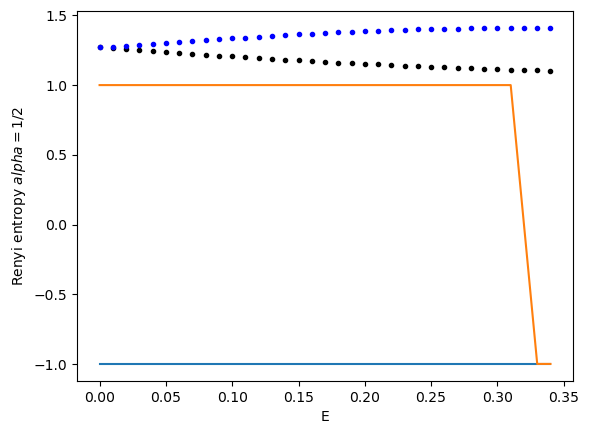

In [43]:
print(len(renyiArray))
print(len(renyiArray_Kp))
plt.plot(electricArray,renyiArray, 'k.',electricArray_Kp,renyiArray_Kp, 'b.')
#print(renyiArray)
plt.xlabel('E')
plt.ylabel('Renyi entropy $alpha = 1/2$')

#plt.plot((np.gradient(renyiArray, electricArray)*np.gradient(renyiArray_Kp, electricArray_Kp)))

print(np.min(np.gradient(renyiArray, electricArray)*np.gradient(renyiArray_Kp, electricArray_Kp)))

plt.plot(electricArray, np.sign(np.gradient(renyiArray, electricArray)))
plt.plot(electricArray_Kp, np.sign(np.gradient(renyiArray_Kp, electricArray_Kp)))
#plt.plot(np.sign(np.gradient(renyiArray, electricArray)*np.gradient(renyiArray_Kp, electricArray_Kp)))

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

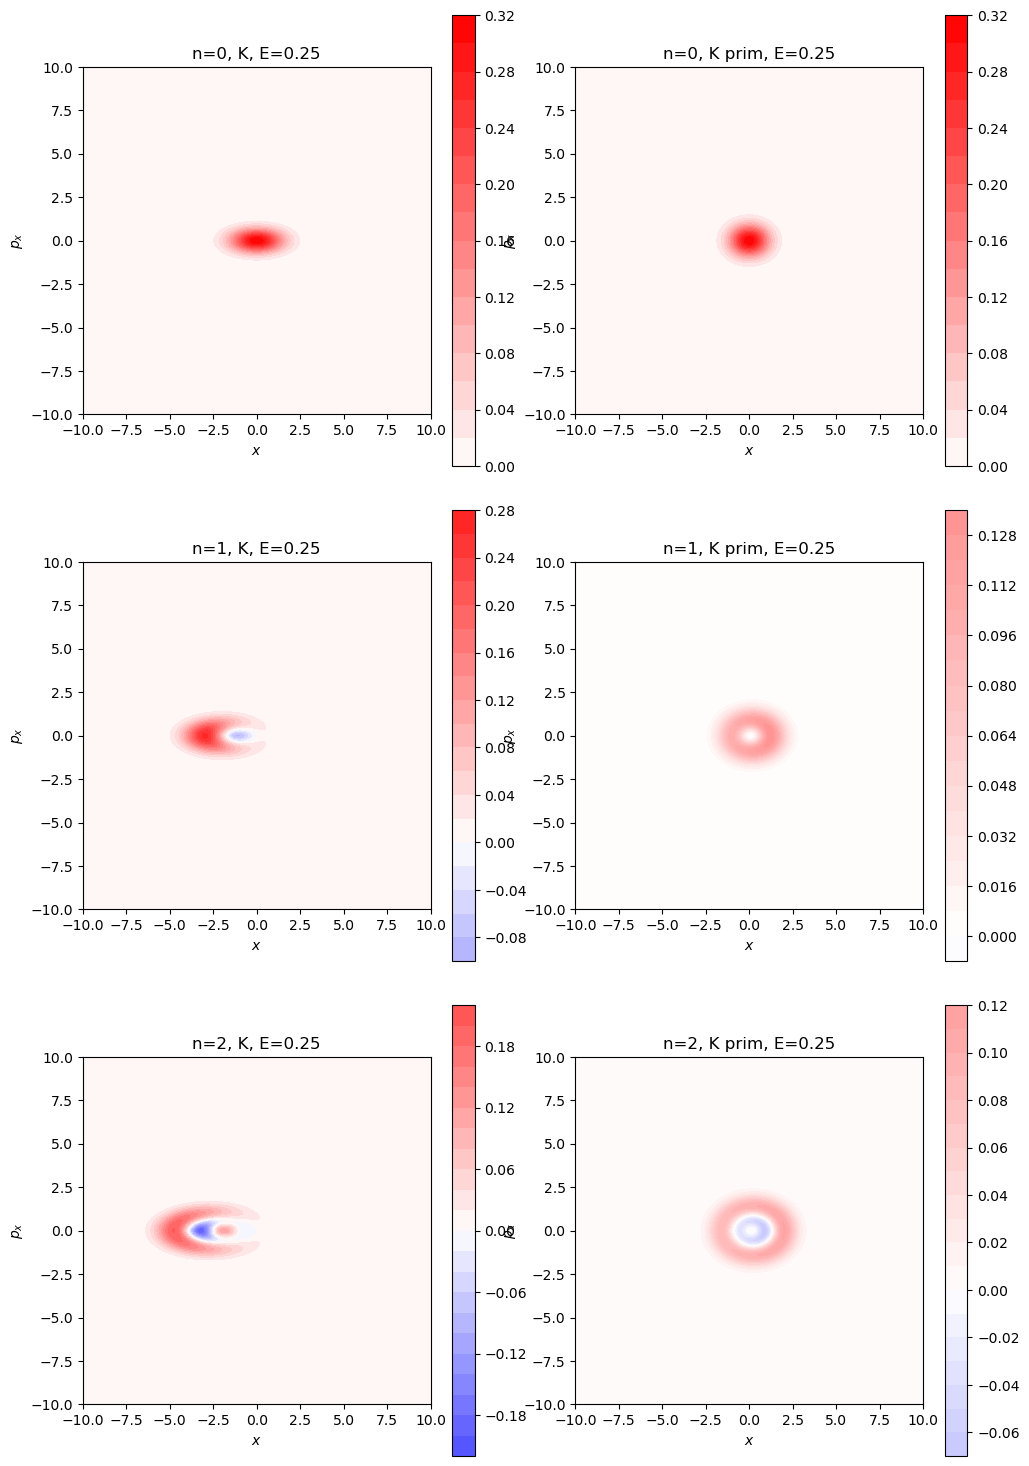

In [45]:
fig, axs = plt.subplots(3, 2, figsize=(10,15), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()
fig.tight_layout()

E = 0.25
lbda = 1

n = 0
delta = 1
mu=1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figA = axs[0].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[0].set(xlabel='$x$', ylabel = '$p_x$')
#axs[0].ylabel('$p_x$') 
fig.colorbar(figA, ax = axs[0])
axs[0].set_title('n=0, K, E=0.25')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[0].set_aspect('equal')

n = 0
delta = 1
mu=-1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figB = axs[1].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[1].set(xlabel='$x$', ylabel = '$p_x$')
#axs[1].ylabel('$p_x$') 
fig.colorbar(figB, ax = axs[1])
axs[1].set_title('n=0, K prim, E=0.25')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[1].set_aspect('equal')

n = 1
delta = 0
mu=1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figC = axs[2].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[2].set(xlabel='$x$', ylabel = '$p_x$')
#axs[2].ylabel('$p_x$') 
fig.colorbar(figC, ax = axs[2])
axs[2].set_title('n=1, K, E=0.25')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[2].set_aspect('equal')

n = 1
delta = 0
mu=-1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figD = axs[3].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[3].set(xlabel='$x$', ylabel = '$p_x$')
fig.colorbar(figD, ax = axs[3])
axs[3].set_title('n=1, K prim, E=0.25')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[3].set_aspect('equal')

n = 2
delta = 0
mu=1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figE = axs[4].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[4].set(xlabel='$x$', ylabel = '$p_x$')
#axs[4].ylabel('$p_x$') 
fig.colorbar(figE, ax = axs[4])
axs[4].set_title('n=2, K, E=0.25')# WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[4].set_aspect('equal')

n = 2
delta = 0
mu=-1
beta1 = beta(mu, vy, vt, E/B)
ksi = ((1-beta1**2)**(1/4))*np.sqrt(vy/vx)*(arrayX/lb + lb*ky) + sign(n)*beta1*np.sqrt(2*abs(n))
s = ((1-beta1**2)**(-1/4))*px*lb*((vx/vy)**(1/2))
ksiM, sM = np.meshgrid(ksi,s)
x = np.sqrt(2)*(ksiM + 1j*sM) 

figF = axs[5].contourf(arrayX, px, WDF(x,n,delta, lbda, beta1), levels = 20, cmap = 'bwr', vmax = 1/pi, vmin = -1/pi) 
axs[5].set(xlabel='$x$', ylabel = '$p_x$')
#axs[5].ylabel('$p_x$') 
fig.colorbar(figF, ax = axs[5])
axs[5].set_title('n=2, K prim, E=0.25')#, WDF norm: ' + str(np.trapz(s, np.trapz(ksi,WDF(x,n,delta, lbda, beta1)))))
axs[5].set_aspect('equal')

In [ ]:

# x = np.arange(-4.0, 12.0, 0.01)
# fig, ax = plt.subplots()
# ax.set_ylim(-5.0, 10.0)
# ax.set_title(r'Generalized Laguerre polynomials $L_3^{\alpha}$')
# for alpha in np.arange(0, 5):
#     ax.plot(x, genlaguerre(3, alpha)(x), label=rf'$L_3^{(alpha)}$')
# plt.legend(loc='best')
# plt.show()